## Competición de Kaggle 
COVID19 Global Forecasting (Week 4)
Forecast daily COVID-19 spread in regions around world
https://www.kaggle.com/c/covid19-global-forecasting-week-4

In [1]:
!pip install pycountry

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=0fe71bc5acae308ebcb29e5d477bc94f57021c7abb10d23d4f1923f150117599
  Stored in directory: c:\users\enriq\appdata\local\pip\cache\wheels\e2\aa\0f\c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet
import pycountry

Importing plotly failed. Interactive plots will not work.


In [4]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
train.tail()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
28791,35656,NaN,Zimbabwe,2020-04-18,25.0,3.0
28792,35657,NaN,Zimbabwe,2020-04-19,25.0,3.0
28793,35658,NaN,Zimbabwe,2020-04-20,25.0,3.0
28794,35659,NaN,Zimbabwe,2020-04-21,28.0,3.0
28795,35660,NaN,Zimbabwe,2020-04-22,28.0,4.0


Vemos que el conjunto de datos de entrenamiento llega hasta el 22-04-2020. Veamos una muestra aleatoria dentro del conjunto de entrenamiento 

In [6]:
train.sample(15)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
5947,7356,Heilongjiang,China,2020-03-21,484.0,13.0
21148,26187,NaN,Taiwan*,2020-04-11,385.0,6.0
19757,24466,NaN,Seychelles,2020-03-31,10.0,0.0
8248,10207,NaN,Congo (Kinshasa),2020-03-22,30.0,1.0
25863,32046,Tennessee,US,2020-02-02,0.0,0.0
28437,35236,NaN,West Bank and Gaza,2020-01-31,0.0,0.0
19424,24067,NaN,Saudi Arabia,2020-02-03,0.0,0.0
1958,2421,NaN,Barbados,2020-02-17,0.0,0.0
22361,27708,Connecticut,US,2020-01-27,0.0,0.0
12521,15514,NaN,Holy See,2020-01-31,0.0,0.0


In [7]:
train.isnull().sum()

Id                    0
Province_State    16560
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [8]:
len(train)

28796

Vamos a deshacernos de la columna problemática que no nos interesa

In [9]:
train = train.drop(['Province_State'],axis=1)

In [10]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [11]:
del train['Id']

## Usando Auto ARIMA con los datos de España

In [12]:
df_comp=train.copy()

In [13]:
df_comp.head()

,Country_Region,Date,ConfirmedCases,Fatalities
0,Afghanistan,2020-01-22,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0


In [14]:
df_comp.Date = pd.to_datetime(df_comp.Date, dayfirst = True)
df_comp.set_index("Date", inplace=True)


In [15]:
df_comp.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Afghanistan,0.0,0.0
2020-01-23,Afghanistan,0.0,0.0
2020-01-24,Afghanistan,0.0,0.0
2020-01-25,Afghanistan,0.0,0.0
2020-01-26,Afghanistan,0.0,0.0


In [16]:
df_comp.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Zimbabwe,25.0,3.0
2020-04-19,Zimbabwe,25.0,3.0
2020-04-20,Zimbabwe,25.0,3.0
2020-04-21,Zimbabwe,28.0,3.0
2020-04-22,Zimbabwe,28.0,4.0


In [17]:
df = df_comp[df_comp['Country_Region'] == 'Spain']

In [18]:
df.head()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-01-22,Spain,0.0,0.0
2020-01-23,Spain,0.0,0.0
2020-01-24,Spain,0.0,0.0
2020-01-25,Spain,0.0,0.0
2020-01-26,Spain,0.0,0.0


In [19]:
df.tail()

,Country_Region,ConfirmedCases,Fatalities
Date,,,
2020-04-18,Spain,191726.0,20043.0
2020-04-19,Spain,198674.0,20453.0
2020-04-20,Spain,200210.0,20852.0
2020-04-21,Spain,204178.0,21282.0
2020-04-22,Spain,208389.0,21717.0


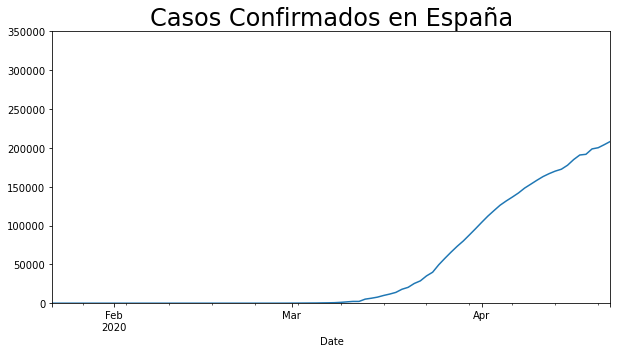

In [20]:
df.ConfirmedCases.plot(figsize=(10,5))
plt.title("Casos Confirmados en España", size = 24)
plt.ylim(0,350000)
plt.show()

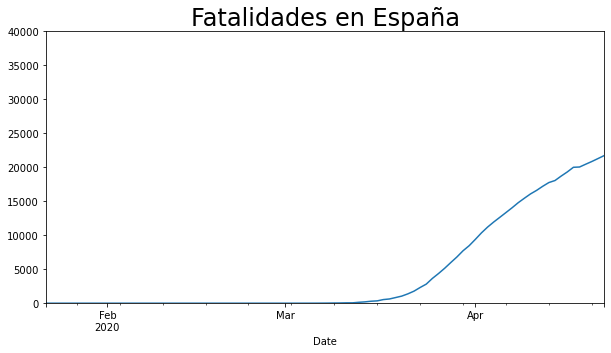

In [21]:
df.Fatalities.plot(figsize=(10,5))
plt.title("Fatalidades en España", size = 24)
plt.ylim(0,40000)
plt.show()

In [22]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [23]:
model_auto = auto_arima(df.ConfirmedCases, m = 5,
                       max_order = None, max_p = 7, max_q = 7, max_d = 2, max_P = 4, max_Q = 4, max_D = 2,
                       maxiter = 50, alpha = 0.05, information_criterion = 'aic')

In [24]:
model_auto

ARIMA(order=(1, 2, 0), scoring_args={}, seasonal_order=(0, 0, 0, 5),
      suppress_warnings=True, with_intercept=False)

In [25]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(1, 2, 0)   Log Likelihood                -763.374
Date:                Tue, 05 Apr 2022   AIC                           1530.747
Time:                        14:37:01   BIC                           1535.747
Sample:                             0   HQIC                          1532.763
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5816      0.052    -11.158      0.000      -0.684      -0.479
sigma2      1.377e+06   9.31e+04     14.786      0.000    1.19e+06    1.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               253.96
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):        33784881.51   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
#Creando el indice del futuro
date = pd.to_datetime("04-23-2020")
date

Timestamp('2020-04-23 00:00:00')

In [27]:
i_date=date + pd.to_timedelta(np.arange(20), 'D')

In [28]:
i_date

DatetimeIndex(['2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12'],
              dtype='datetime64[ns]', freq=None)

In [29]:
predictions=model_auto.predict(len(i_date))

In [30]:
df_test = pd.Series(predictions, index=i_date)
df_test.head()

2020-04-23    212458.675438
2020-04-24    216610.542777
2020-04-25    220714.608740
2020-04-26    224846.475149
2020-04-27    228962.173303
dtype: float64

In [31]:
df_auto_pred = pd.DataFrame({'Predictions': predictions},
                            index = i_date)

In [32]:
df_auto_pred.head()

,Predictions
2020-04-23,212458.675438
2020-04-24,216610.542777
2020-04-25,220714.608740
2020-04-26,224846.475149
2020-04-27,228962.173303


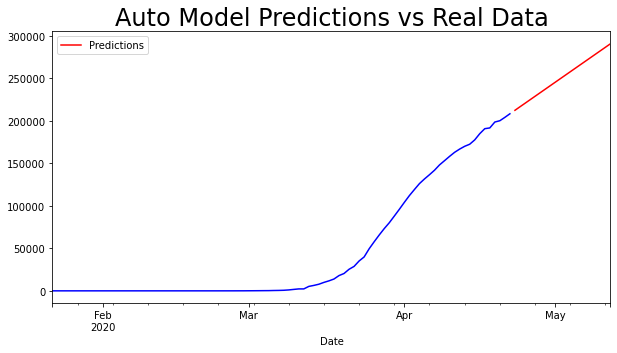

In [33]:
df_auto_pred.plot(figsize = (10,5), color = "red")
df.ConfirmedCases.plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()

## Usando Prophet con los datos de Mexico


In [34]:
df_m = train[train['Country_Region'] == 'Mexico']

In [35]:
len(df_m)

92

In [36]:
df_m.head()

,Country_Region,Date,ConfirmedCases,Fatalities
15916,Mexico,2020-01-22,0.0,0.0
15917,Mexico,2020-01-23,0.0,0.0
15918,Mexico,2020-01-24,0.0,0.0
15919,Mexico,2020-01-25,0.0,0.0
15920,Mexico,2020-01-26,0.0,0.0


In [37]:
confirmed_m=df_m.groupby('Date')['ConfirmedCases'].sum().to_frame().reset_index()

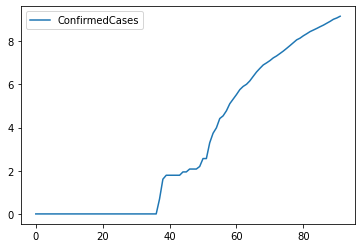

In [38]:
confirmed_m['ConfirmedCases'] = np.log(1+confirmed_m['ConfirmedCases'])
confirmed_m.plot()
plt.show()

In [39]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
confirmed_m.tail()

,ds,y
87,2020-04-18,8.835792
88,2020-04-19,8.922392
89,2020-04-20,9.019422
90,2020-04-21,9.079434
91,2020-04-22,9.159258


In [44]:
#model_m = Prophet(interval_width=0.95)

model_m = Prophet()
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
future_m

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
117,2020-05-18
118,2020-05-19
119,2020-05-20
120,2020-05-21


In [45]:
forecast_m = model_m.predict(future_m)
forecast_m[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-0.086404,-0.378226,0.195708
1,2020-01-23,-0.086878,-0.369665,0.207026
2,2020-01-24,-0.056851,-0.316770,0.237484
3,2020-01-25,0.030583,-0.246410,0.313032
4,2020-01-26,0.045468,-0.253794,0.321594


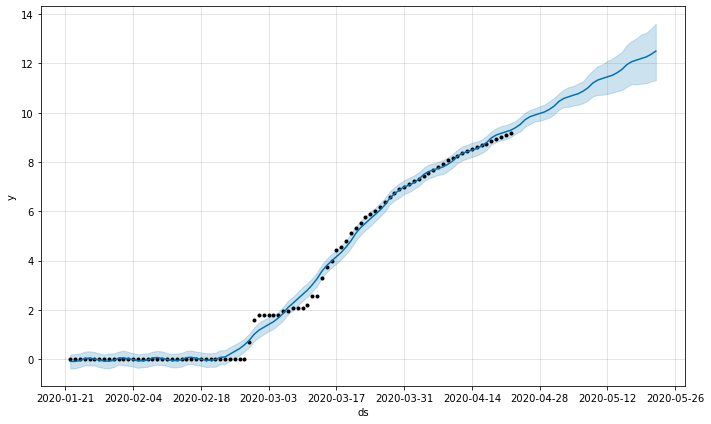

In [46]:
confirmed_forecast_plot = model_m.plot(forecast_m)

# Fatalities

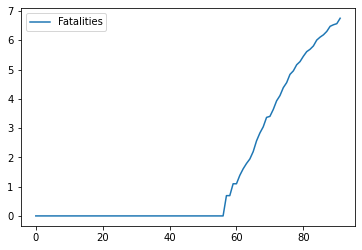

In [47]:
confirmed_m=df_m.groupby('Date')['Fatalities'].sum().to_frame().reset_index()
confirmed_m['Fatalities'] = np.log(1+confirmed_m['Fatalities'])
confirmed_m.plot()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


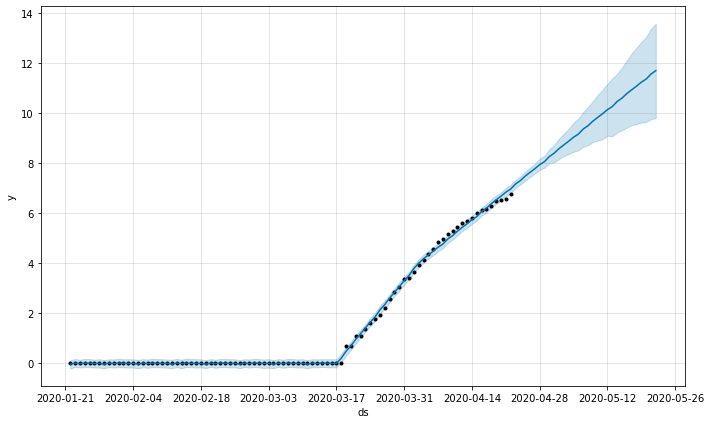

In [48]:
confirmed_m.columns = ['ds','y']
confirmed_m['ds'] = pd.to_datetime(confirmed_m['ds'])
model_m = Prophet(interval_width=0.95)
model_m.fit(confirmed_m)
future_m = model_m.make_future_dataframe(periods=30)
future_confirmed_m = future_m.copy() 
forecast_m = model_m.predict(future_m)
confirmed_forecast_plot = model_m.plot(forecast_m)